<h1>T4 - Traçado de Raios<h3/>

<p></p>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, sqrt
import sys

TOL = sys.float_info.epsilon
print(TOL)

2.220446049250313e-16


In [11]:
def vetor(x, y, z):
    return  np.array([x, y, z], dtype = np.float)

def dot(u, v):
    return u[0] * v[0] + u[1] * v[1] + u[2] * v[2]

def norma(u):
    return sqrt(dot(u, u))

def unitario(v):
    s = norma(v)
    
    if (s > TOL):
        return v/s
    
    else:
        return None

def ang(v1, v2):
    num = dot(v1, v2)
    den = norm(v1) * norm(v2)
    
    return np.arccos(num/den) * 180 / np.pi if den > TOL else 0

def reflete(v, n):
    r = 2 * dot(v, n) * n - v
    return r

def cross(u, v):
    return vetor(u[1] * v[2] - u[2] * v[1], u[2] * v[0] - u[0] * v[2], u[0] * v[1] - u[1] * v[0]) 

In [25]:
class Camera:
    def __init__(self, fov, w, h, dfocal, eye, at, up):
        self.fov = fov
        self.w = w
        self.h = h
        self.dfocal = dfocal
        
        self.a = 2 * dfocal * np.tan(fov * np.pi / 360)
        self.b = self.a * w / h
        self.eye = eye
        
        self.ze = unitario(at - eye)
        self.xe = unitario(cross(self.ze, up))
        self.ye = cross(self.ze, self.xe)
        self.img = np.zeros(shape = (h, w, 3), dtype = np.float)
    
    def ray_to(self, x_im, y_im):
        dx = self.b * (x_im / self.w - 0.5)
        dy = self.a * (y_im / self.h - 0.5)
        dz = self.dfocal
        
        ray = dx * self.xe + dy * self.ye + dz * self.ze
        
        return ray
    
    def get_eye(self):
        return self.eye

    def pixel (self, x_im, y_im, rgb):
        self.img[y_im, x_im, :] = rgb
        
    def get_w(self):
        return self.w
    
    def get_h(self):
        return self.h
    
    def imshow(self):
        plt.figure(figsize = (8, 4))
        plt.imshow(self.img)
        plt.show()
    
    def show(self):
        print("fov =", self.fov, "d =", self.dfocal)
        print("(w, h) = (", self.w, ",", self.h, ")")
        print("(b, a) = (", self.b, ",", self.a, ")")
        print("xe =", self.xe)
        print("ye =", self.ye)
        print("ze =", self.ze)

In [35]:
eye = vetor(5, 0, 0)
at = vetor(0, 0, 0)
up = vetor(0, 0, 1)
camera = Camera(90, 800, 600, 1, eye, at, up)
camera.show()

fov = 90 d = 1
(w, h) = ( 800 , 600 )
(b, a) = ( 2.666666666666666 , 1.9999999999999998 )
xe = [ 0.  1. -0.]
ye = [-0.  0. -1.]
ze = [-1.  0.  0.]


In [44]:
class Esfera:
    def __init__(self, raio, centro, material):
        self.raio = raio
        self.centro = centro
        self.material = material
        
    def show(self):
        print(f'raio = {self.raio}')
        print(f'centro = {self.centro}')
        print(f'material = {self.material}')
    
    def intercepta(self, origem, direcao):
        a = dot(direcao, direcao)
        b = 2 * dot(direcao, origem - self.centro)
        c = dot(origem - self.centro, origem - self.centro) - self.raio**2
        delta = b**2 - 4 * a * c
        
        if delta > TOL:
            raiz = sqrt(delta)
            t1 = (-b - raiz) / 2 * a
            t2 = (-b + raiz) / 2 * a
            t = t1 if t1 < t2 else t2
            
            return t if t > 0 else np.inf
        
        else:
            return np.inf
     
    def normal(self, ponto):
        return unitario(ponto - self.centro)        

In [45]:
esfera = Esfera(3, vetor(0, 0, 0), vetor(1, 1, 0))
esfera.show()

raio = 3
centro = [0. 0. 0.]
material = [1. 1. 0.]


In [50]:
class Cena:
    def __init__(self, camera, objetos, luzes):
        self.camera = camera
        self.objetos = objetos
        self.luzes = luzes
    
    def show(self):
        self.camera.show()
        
        for obj in self.objetos:
            obj.show()
        
        for luz in self.luzes:
            luz.show()
    
    def ray_trace(self):
        w = self.camera.get_w()
        h = self.camera.get_h()
        origem = self.camera.get_eye()
        
        for y in range(h):
            
            for x in range(w):
                direcao = self.camera.ray_to(x, y)
                ti = np.inf
                obji = None
                
                for obj in self.objetos:
                    t = obj.intercepta(origem, direcao)
                    if t < ti:
                        ti = t
                        obji = obj
                
                if obji:
                    ponto = origem + ti * direcao
                    normal = obji.normal(ponto)
                    luz = vetor(0, 1, 0)
                    
                    rgb = obji.material * dot(luz, normal)
                    self.camera.pixel(x, y, rgb)

In [51]:
objetos = [esfera]
luzes = []
cena = Cena(camera, objetos, luzes)
cena.show()

fov = 90 d = 1
(w, h) = ( 800 , 600 )
(b, a) = ( 2.666666666666666 , 1.9999999999999998 )
xe = [ 0.  1. -0.]
ye = [-0.  0. -1.]
ze = [-1.  0.  0.]
raio = 3
centro = [0. 0. 0.]
material = [1. 1. 0.]


In [52]:
cena.ray_trace()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


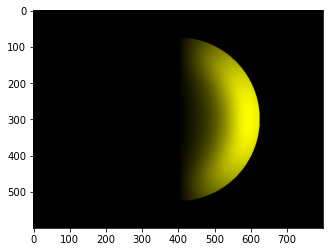

In [53]:
camera.imshow()